# 4.10 Coding Etiquette & Excel Reporting: Analyzing Profiles

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [7]:
# Importing project data

path = r'C:\Users\IVON6\Instacart Basket Analysis'
profiling_cust_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'profiling_cust_data.pkl'))

In [8]:
# Display all column names

profiling_cust_data.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'first_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_price',
 'spenders',
 'median_days_since_prior_order',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'num_dependants',
 'marital_status',
 'income',
 '_merge',
 'region',
 'activity_flag',
 'age_group',
 'customer_profile']

In [11]:
profiling_cust_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,num_dependants,marital_status,income,_merge,region,activity_flag,age_group,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,65+,Married Without Children
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,65+,Married Without Children
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,high-activity customer,65+,Married With Children
5,1,Chocolate Sandwich Cookies,61,19,5.80,1701441,777,16,1,7,26.00,False,7,0,Mid-range product,Busiest day,Busiest days,Average orders,26,Regular customer,6.94,Low spender,11.00,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,high-activity customer,41-54,Married With Children
6,1,Chocolate Sandwich Cookies,61,19,5.80,1871483,825,3,2,14,30.00,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.96,Low spender,20.00,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,high-activity customer,18-24,Living with Parents


## Creating Visualizations

## Create an appropriate visualization to show the distribution of profiles

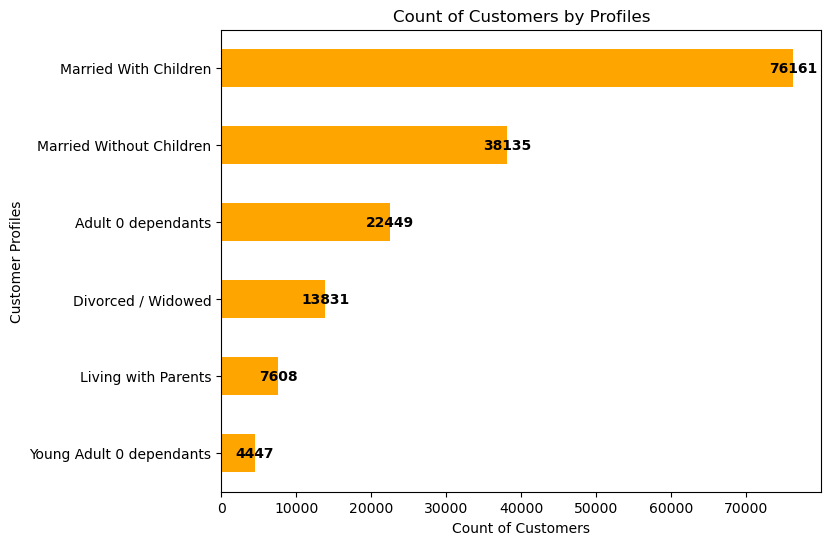

In [15]:
# Create a bar chart for profiles

# Number of customers for each profile
customer_counts = profiling_cust_data.groupby('customer_profile')['user_id'].nunique().sort_values(ascending=True)

plt.figure(figsize=(10, 6))

# Plotting the bar chart
profile_counts = customer_counts.plot.barh(color= 'Orange')

# Adding title and labels to the plot
profile_counts.set_title("Count of Customers by Profiles")
profile_counts.set_xlabel("Count of Customers")
profile_counts.set_ylabel("Customer Profiles")

# Adding counts to each bar
for index, value in enumerate(customer_counts):
    profile_counts.text(value, index, str(value), ha='center', va='center', color='black', fontsize=10, weight='bold')

# Adjust spacing for y-axis labels
plt.subplots_adjust(left=0.3)

# Showing the plot
plt.show()

In [17]:
# Exportig chart "Counts of customers by profiles"

profile_counts.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'customer_profile_counts.png'))

## Aggregate the max, mean, and min variables on a customer-profile level 

In [20]:
# checking prices

profiling_cust_data['prices'].describe()

count   30964564.00
mean          11.93
std          491.34
min            1.00
25%            4.20
50%            7.40
75%           11.30
max        99999.00
Name: prices, dtype: float64

In [22]:
# Checking ouliers where the price is above 100$

cust_profiling_filtered = profiling_cust_data.loc[profiling_cust_data['prices'] < 100]

In [23]:
cust_profiling_filtered.groupby('customer_profile').agg({"days_since_prior_order":["min", "max", "mean"], "prices":["min", "max", "mean"]})

days_since_prior_order             prices           
                                            min   max  mean    min   max mean
customer_profile                                                             
Adult 0 dependants                         0.00 30.00 10.79   1.00 25.00 7.79
Divorced / Widowed                         0.00 30.00 10.75   1.00 25.00 7.80
Living with Parents                        0.00 30.00 10.75   1.00 25.00 7.80
Married With Children                      0.00 30.00 10.82   1.00 25.00 7.79
Married Without Children                   0.00 30.00 10.81   1.00 25.00 7.80
Young Adult 0 dependants                   0.00 30.00 10.94   1.00 25.00 7.77

## Which group of customers generated the maximum revenue?

In [27]:
# Group the data by 'profile' and calculate various aggregations

revenue_summary = cust_profiling_filtered.groupby('customer_profile').agg({'prices': ['sum'],'customer_profile': 'count'})

In [28]:
# Rename the columns
revenue_summary.columns = ['Revenue', 'Count']

# Calculate Revenue divided by Count

revenue_summary['Revenue/Count'] = revenue_summary['Revenue'] / revenue_summary['Count']

# Reset the index

revenue_summary = revenue_summary.reset_index()

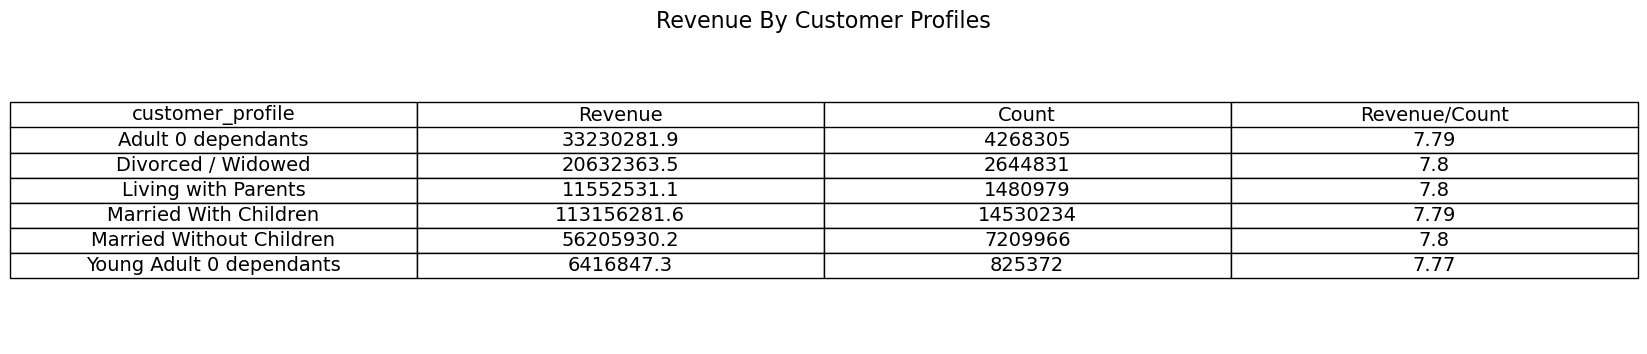

In [31]:
## Create a table

revenue_summary['Revenue/Count'] = revenue_summary['Revenue/Count'].round(2)

# Set up the figure and axis
plt.figure(figsize=(14, 4))
ax = plt.gca()
ax.axis('off')

# Create a table visualization using pandas styling
table = ax.table(cellText=revenue_summary.values,
                 colLabels=revenue_summary.columns,
                 cellLoc='center',
                 loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)

# Add a title to the table
plt.title("Revenue By Customer Profiles", fontsize=16)

# Save table as a PNG image with the table name and path

table_name = 'customer_profile_revenue'
plt.savefig(os.path.join(path, '02 Data', 'Visualizations', f'{table_name}.png'), bbox_inches='tight', pad_inches=0.5, dpi=300)

plt.show()

## Compare your customer profiles with regions and departments. 

### Comparing By Region

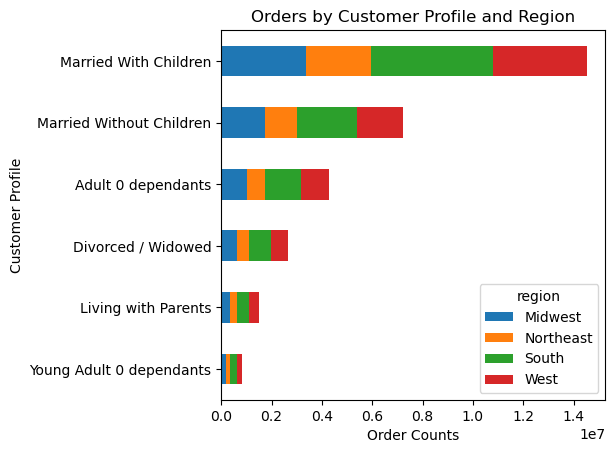

In [35]:
## Customer Profiles by Region

# Grouping customer profiles and regions
grouped = cust_profiling_filtered.groupby(['customer_profile', 'region']).size().unstack()

#Sorting values
sorted_grouped = grouped.sort_values(by=list(grouped.columns), ascending=True)

#Plotting the data
bar = sorted_grouped.plot(kind='barh', stacked=True)

# Adding title and labels to the plot
bar.set_title("Orders by Customer Profile and Region")
bar.set_xlabel("Order Counts")
bar.set_ylabel("Customer Profile")

# Adjust spacing for x-axis labels
plt.subplots_adjust(left=0.3)

# Showing the plot
plt.show()

In [37]:
# Exporting chart "Orders by Customer Profiles by Region"

bar.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'profile_region_orders.png'))

### Comparing By Department

In [40]:
# Importing department_wrangled.csv

departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'department_wrangled.csv'))

In [42]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [44]:
# Rename a single column

departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [46]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [48]:
### Merge the cust_profiling_filtered DataFrame with the departments DataFrame based on department_id

merged_data = cust_profiling_filtered.merge(departments, on='department_id', how='left')

In [49]:
merged_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,num_dependants,marital_status,income,_merge,region,activity_flag,age_group,customer_profile,department
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,65+,Married Without Children,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,65+,Married Without Children,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,high-activity customer,65+,Married With Children,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.80,1701441,777,16,1,7,26.00,False,7,0,Mid-range product,Busiest day,Busiest days,Average orders,26,Regular customer,6.94,Low spender,11.00,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,high-activity customer,41-54,Married With Children,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.80,1871483,825,3,2,14,30.00,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.96,Low spender,20.00,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,high-activity customer,18-24,Living with Parents,snacks


In [52]:
merged_data['department'].value_counts()

department
produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

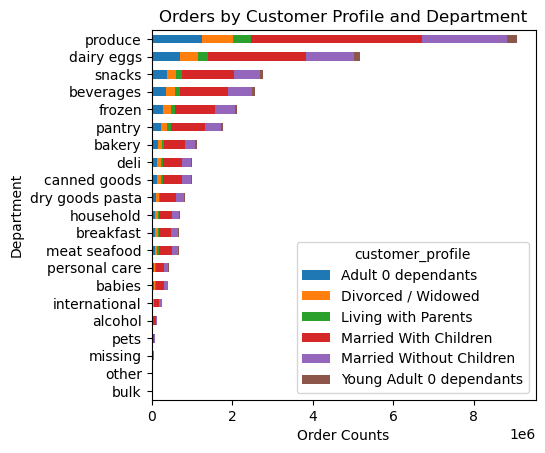

In [54]:
## Profile by departments

# Grouping customer profiles and regions
grouped = merged_data.groupby(['department', 'customer_profile']).size().unstack()

#Sorting values
sorted_grouped = grouped.sort_values(by=list(grouped.columns), ascending=True)

#Plotting the data
bar = sorted_grouped.plot(kind='barh', stacked=True)

# Adding title and labels to the plot
bar.set_title("Orders by Customer Profile and Department")
bar.set_xlabel("Order Counts")
bar.set_ylabel("Department")

# Adjust spacing for x-axis labels
plt.subplots_adjust(left=0.3)

# Showing the plot
plt.show()

In [56]:
# Exporting chart "Orders by profile and department"

bar.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'department_profile_counts.png'))

## Additional Analysis to produce suitable charts to illustrate results. 

#### Which department have the highest frequency of product orders?

In [60]:
merged_data['department'].value_counts()

department
produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

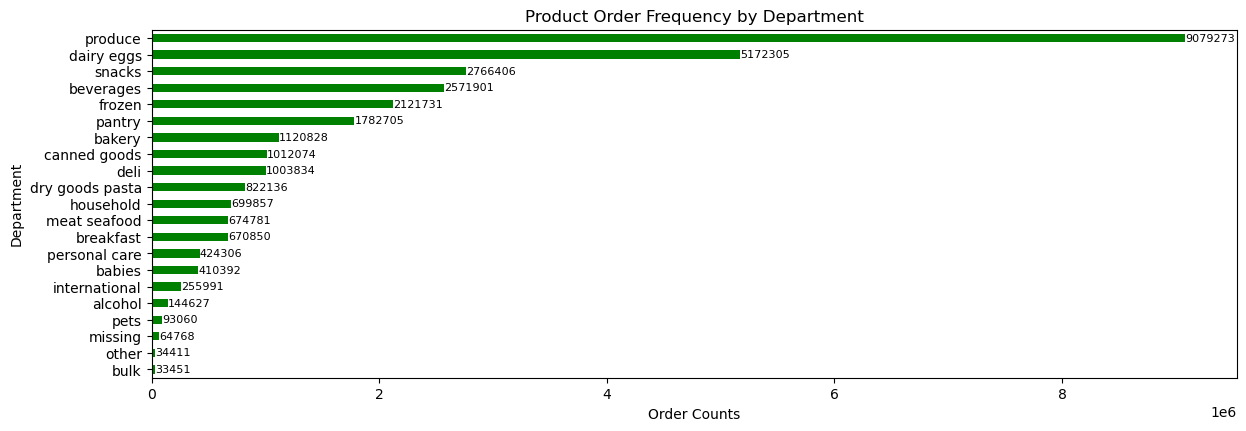

In [62]:
## Departments + orders frequency

#Sorting values
depart_freq = merged_data['department'].value_counts(ascending=True)

plt.figure(figsize=(14, 6))

#Plotting the data
bar = depart_freq.plot(kind='barh', color= 'Green' , stacked=True)

# Adding title and labels to the plot
bar.set_title("Product Order Frequency by Department")
bar.set_xlabel("Order Counts")
bar.set_ylabel("Department")

# Adding counts to each bar
for index, value in enumerate(depart_freq):
    bar.text(value, index, str(value), ha='left', va='center', color='black', fontsize=8)

# Adjust spacing for x-axis labels
plt.subplots_adjust(bottom=0.3)

# Showing the plot
plt.show()

In [64]:
# Exporting chart

bar.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'depart_freq_orders.png'))

#### Order Habits Based on Loyalty Status

In [67]:
# Calculate value counts for loyalty_flag

loyalty_order_counts = merged_data.groupby('loyalty_flag')['order_id'].count().sort_values(ascending = False).reset_index()

In [69]:
# Check
loyalty_order_counts

,loyalty_flag,order_id
0,Regular customer,15874128
1,Loyal customer,10282763
2,New customer,4802796


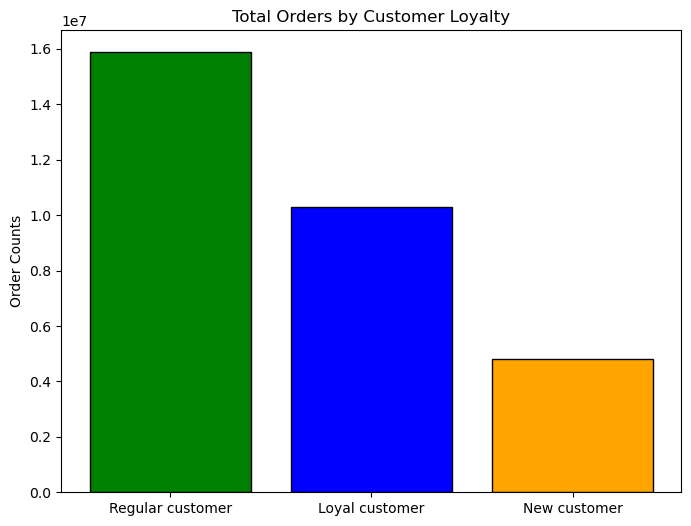

In [71]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['Green', 'Blue', 'Orange']

# Plot bars
bars = plt.bar(loyalty_order_counts['loyalty_flag'], loyalty_order_counts['order_id'], color=colors, edgecolor='black', zorder=2)
plt.title("Total Orders by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Order Counts")
plt.savefig(os.path.join(path, '02 Data', 'Visualizations', 'Total_order_by_loyalty.png'), bbox_inches = 'tight')

In [73]:
merged_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,num_dependants,marital_status,income,_merge,region,activity_flag,age_group,customer_profile,department
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,65+,Married Without Children,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,65+,Married Without Children,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,high-activity customer,65+,Married With Children,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.80,1701441,777,16,1,7,26.00,False,7,0,Mid-range product,Busiest day,Busiest days,Average orders,26,Regular customer,6.94,Low spender,11.00,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,high-activity customer,41-54,Married With Children,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.80,1871483,825,3,2,14,30.00,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.96,Low spender,20.00,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,high-activity customer,18-24,Living with Parents,snacks


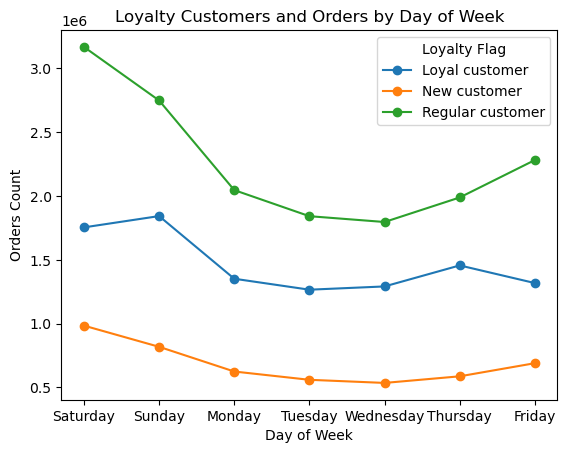

In [75]:
# Group by 'loyalty_flag' and 'orders_day_of_week'
grouped_data = merged_data.groupby(['loyalty_flag', 'orders_day_of_week']).size()

# Convert the multi-index to columns 
grouped_data = grouped_data.unstack(level='loyalty_flag')

# Create the line chart
line = grouped_data.plot(kind='line', marker='o')

# Customize the plot
plt.title('Loyalty Customers and Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Orders Count')
plt.xticks(range(7))
plt.legend(title='Loyalty Flag')

# Changing the tick labels for the x-axis
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
line.set_xticklabels(day_labels, rotation=0)

# Display the plot
plt.show()

# Exporting chart

line.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'oders_day_week_loyal.png'))

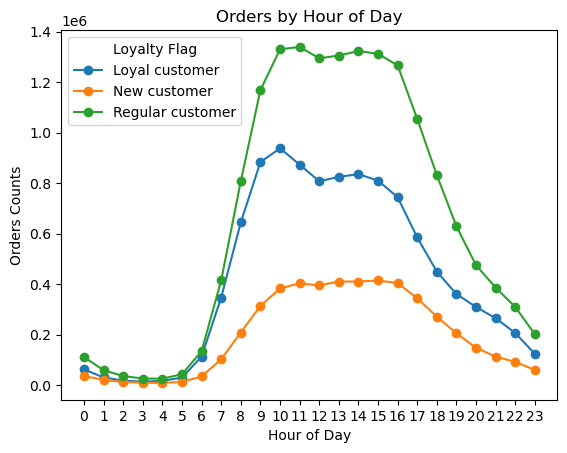

In [77]:
# Group by 'loyalty_flag' and 'order_hour_of_day'
grouped_data = merged_data.groupby(['loyalty_flag', 'order_hour_of_day']).size()

# Convert the multi-index to columns
grouped_data = grouped_data.unstack(level='loyalty_flag')

# Create the line chart
line = grouped_data.plot(kind='line', marker='o')

# Customize the plot
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Orders Counts')
plt.xticks(range(24))
plt.legend(title='Loyalty Flag')

# Exporting chart

line.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'oders_hour_day_loyal.png'))

# Display the plot
plt.show()

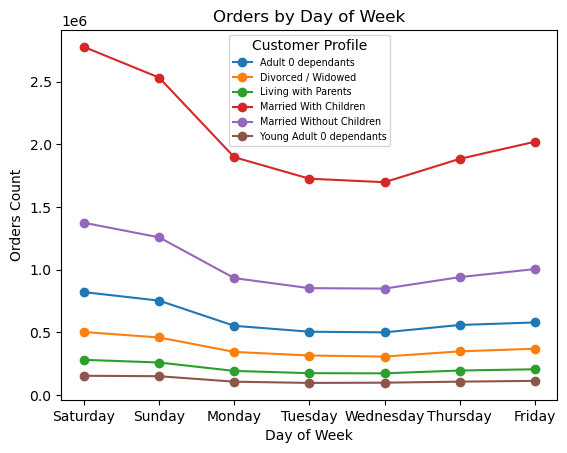

In [79]:
# Group by 'customer profiles' and 'orders_day_of_week'
grouped_data = merged_data.groupby(['customer_profile', 'orders_day_of_week']).size()

# Convert the multi-index to columns 
grouped_data = grouped_data.unstack(level='customer_profile')

# Create the line chart
line = grouped_data.plot(kind='line', marker='o')

# Customize the plot
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Orders Count')
plt.xticks(range(7))
plt.legend(title='Customer Profile', fontsize='x-small', loc="upper center")

# Changing the tick labels for the x-axis
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
line.set_xticklabels(day_labels, rotation=0)

# Exporting chart

line.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'oders_day_week_cust_profile.png'))

# Display the plot
plt.show()